In [22]:
import pandas as pd
import numpy as np

import os

import scenedetect
from scenedetect.video_manager import VideoManager
from scenedetect.scene_manager import SceneManager
from scenedetect.frame_timecode import FrameTimecode
from scenedetect.stats_manager import StatsManager
from scenedetect.detectors import ContentDetector
STATS_FILE_PATH = 'testvideo-stats.csv'

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

In [2]:
#import csv files as pandas
movieRuntimes = pd.read_csv('C:\\Users\\hasna\\Desktop\\Smell of Fear\\Numerical Data\\movie_runtimes.csv')
movieList = list(movieRuntimes['movie'])

In [16]:
#detect number of scenes within a 30 second period
for movie in movieList:
    aslList = list()
    effectiveRuntime = movieRuntimes['effective runtime'][movieList.index(movie)]
    for j in range(0, effectiveRuntime):
        moviePath = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Movie Intervals\\' + movie + '\\' + movie + '_' + str(j) +'.mp4'
        video_manager = VideoManager([moviePath])
        stats_manager = StatsManager()
        scene_manager = SceneManager(stats_manager)
        scene_manager.add_detector(ContentDetector(40))
        #Set downscale factor to improve processing speed 
        video_manager.set_downscale_factor()
        #Start video_manager.
        video_manager.start()
        #Perform scene detection on video_manager.
        scene_manager.detect_scenes(frame_source=video_manager)
        scene_list = scene_manager.get_scene_list(video_manager.get_base_timecode())
        aslList.append(len(scene_list))
        video_manager.release()
    #save the ASL List
    savePath = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\ASL\\' + movie + '.p'
    pickle.dump(aslList, open(savePath, "wb" ))

100%|███████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 282.37frames/s]


100%|███████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 291.46frames/s]


100%|███████████████████████████████████████████████████████████████████████████| 720/720 [00:02<00:00, 254.76frames/s]


100%|███████████████████████████████████████████████████████████████████████████| 721/721 [00:02<00:00, 279.75frames/s]


100%|███████████████████████████████████████████████████████████████████████████| 721/721 [00:02<00:00, 277.65frames/s]


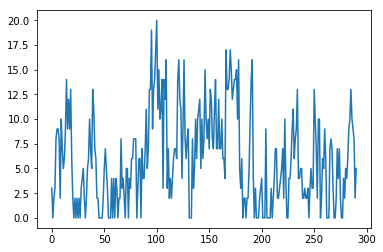

In [20]:
plt.figure()
plt.plot(aslList)

In [23]:
    #save the ASL List
    savePath = 'C:\\Users\\hasna\\Desktop\\Smell of Fear\\Pickle Objects\\ASL\\' + movie + '.p'
    pickle.dump(aslList, open(savePath, "wb" ))